# i. Perkenalan

<h2><b>Model untuk memprediksi nutrisi pada tanaman</b></h2>

<h4><b>Ananda Khairurriza</b></h4>
<h4><b>Batch:</b> FTDS-017 RMT</h4>
<h4><b>Dataset yang digunakan: </b></h4> 
Dataset yang digunakan adalah data informasi nutrisi tanaman dan variabel yang mempengaruhi nutrisi tanaman dari perusahaan Aria.
<h4><b>Objective: </b></h4>

Project ini bertujuan untuk membuat model yang dapat memprediksi nilai nutrisi pada tanaman dan faktor apa saja yang mempengaruhi nutrisi pada tanaman. 

<h4><b>Link Website Model Deployment:</b></h4> 

https://huggingface.co/spaces/AnandaKhairurriza/Aria_Plant_Nutrition


# ii. Import Libraries

Berikut merupakan library yang digunakan dalam mengalanisis serta perancangan model.

In [196]:
# Libraries yang dibutuhkan untuk project

import numpy as np # Untuk mengolah array
import pandas as pd # Untuk mengolah data tabular
import math  # Untuk perhitungan matematis

# Untuk visualisasi chart
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # Untuk memisahkan train set dan test set
from feature_engine.outliers import Winsorizer # Untuk handling outlier dengan teknik censoring
from sklearn.model_selection import GridSearchCV # Untuk pencarian hyperparameter tuning

from sklearn.feature_selection import f_regression, f_classif # Untuk uji korelasi
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Untuk scaling

# Machine learning
from sklearn.linear_model import LinearRegression # Untuk modeling menggunakan algoritma Linear Regression
from sklearn.neighbors import KNeighborsRegressor # Untuk modeling menggunakan algoritma KNN
from sklearn.tree import DecisionTreeRegressor # Untuk modeling menggunakan algoritma Decision Tree
from sklearn.ensemble import RandomForestRegressor # Untuk modeling menggunakan algoritma Random Forest
from sklearn.ensemble import AdaBoostRegressor # Untuk modeling menggunakan algoritma Ada Boost
from sklearn.svm import SVR # Untuk modeling menggunakan algoritma SVM

from sklearn.metrics import mean_squared_error # Metriks untuk evaluasi model

import pickle # Untuk menyimpan library binary
import json # Untuk menyimpan list fitur

Adapun versi python dan library yang digunakan dalam mengerjakan project ini adalah:
<ul>
    <li>Python versi <b>3.11.0</b></li>
    <li>Numpy versi <b>1.23.5</b></li>
    <li>Pandas versi <b>1.5.2</b></li>
    <li>SciPy versi <b>1.9.3</b></li>
    <li>Feature-engine versi <b>1.5.2</b></li>
    <li>Scikit-Learn versi <b>1.2.0</b></li>
    <li>Seaborn versi <b>0.12.1</b></li>
</ul>

# iii. Loading data

Pada tahap ini penyiapan data yang dibutuhkan sebelum dilakukan analisis lebih lanjut. Proses ini meliputi loading dataset pengecekan informasi dataset, pengecekan data duplikat, perubahan nama kolom jika diperlukan, dan langkah lain yang dianggap diperlukan.

### Load data

In [197]:
# Load dataset
df = pd.read_excel("dataset/aria_data.xlsx")
df

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


### Informasi data

In [198]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Dari hasil informasi dataset kolom target dan v1 sampai v8 bertipe numerik (float), kemudian kolom sample_type bertipe string (object). Jumlah data pada dataset adalah 160 data dan tidak ada data null pada dataset ini (160 non-null dari 160 data).

Menurut informasi mengenai dataset, berikut adalah informasi dari setiap kolom:
<ul>
    <li><b>target:</b> Nilai prediksi nutrisi pada tanaman.</li>
    <li><b>v1 - v8:</b> Variabel yang mempengaruhi nilai nutrisi pada tanaman.</li>
    <li><b>sample_type:</b> Jenis laboratorium dimana sampel diperoleh.</li>
</ul>

### Cek data duplikat

Data duplikat merupakan data yang secara nilai/value sama dengan data lain. Jika terdapat data duplikat maka perlu dilakukan treatment terhadap data tersebut.

In [199]:
# Cek data duplikat
check = df.duplicated()
check.value_counts()

False    160
dtype: int64

Dari hasil pemeriksaan tidak ada data duplikat pada dataset ini.

### Cek kardinalitas

Dilakukan pengecekan kardinalitas terhadap kolom nominal. Kardinalitas merupakan banyaknya jenis kelompok/macam pada dataset, jika terlalu besar maka perlu disederhanakan untuk mengoptimalkan pada saat training model.

In [200]:
# Cek cardinality pada kolom string
df["sample_type"].nunique()

2

Dari hasil pengecekan kardinalitas kolom sample_type hanya memiliki dua jenis group, sehingga tidak perlu disederhanakan.

# iv. EDA (Exploratory Data Analysis)

EDA (Exploratory Data Analysis) merupakan proses pengenalan dan eksplorasi pada dataset untuk mendapatkan informasi mengenai dataset.

### Perbandingan jumlah data berdasarkan lab sample

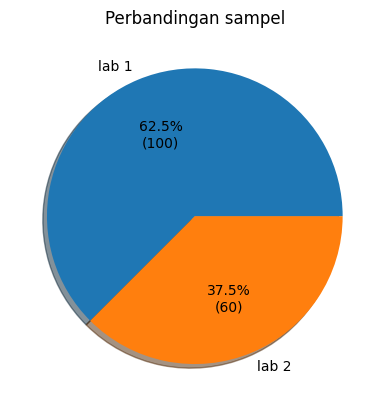

In [201]:
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, len(df)*x/100)

de_cmp = df["sample_type"].value_counts()
plt.title("Perbandingan sampel")
plt.pie(de_cmp, labels=de_cmp.index, shadow = True, autopct=fmt)
plt.show()

Dari hasil perbandingan, sebagian besar data diambil dari lab 1 (100 data) dibandingkan lab 2 (60 data).

### Rentang nutrisi tanaman pada dataset

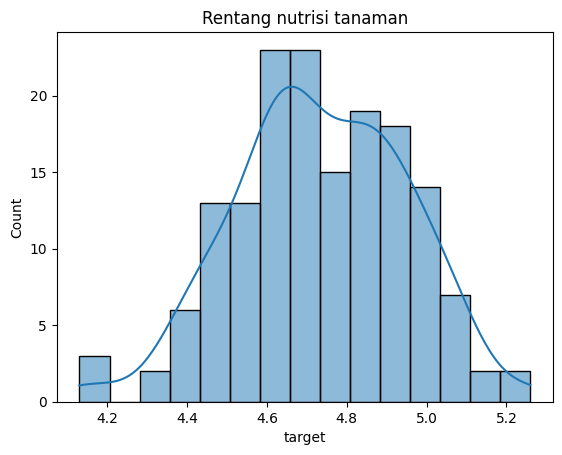

In [202]:
plt.title("Rentang nutrisi tanaman")
sns.histplot(data=df["target"], kde=True, bins=15)
plt.show()

Rentang nilai nutrisi pada dataset adalah dari 4.1 hingga 5.3, kemudian sebagian besar nutrisi tanaman berada pada nilai 4.6 sampai 4.7. 

### Rentang variabel yang mempengaruhi nutrisi tanaman

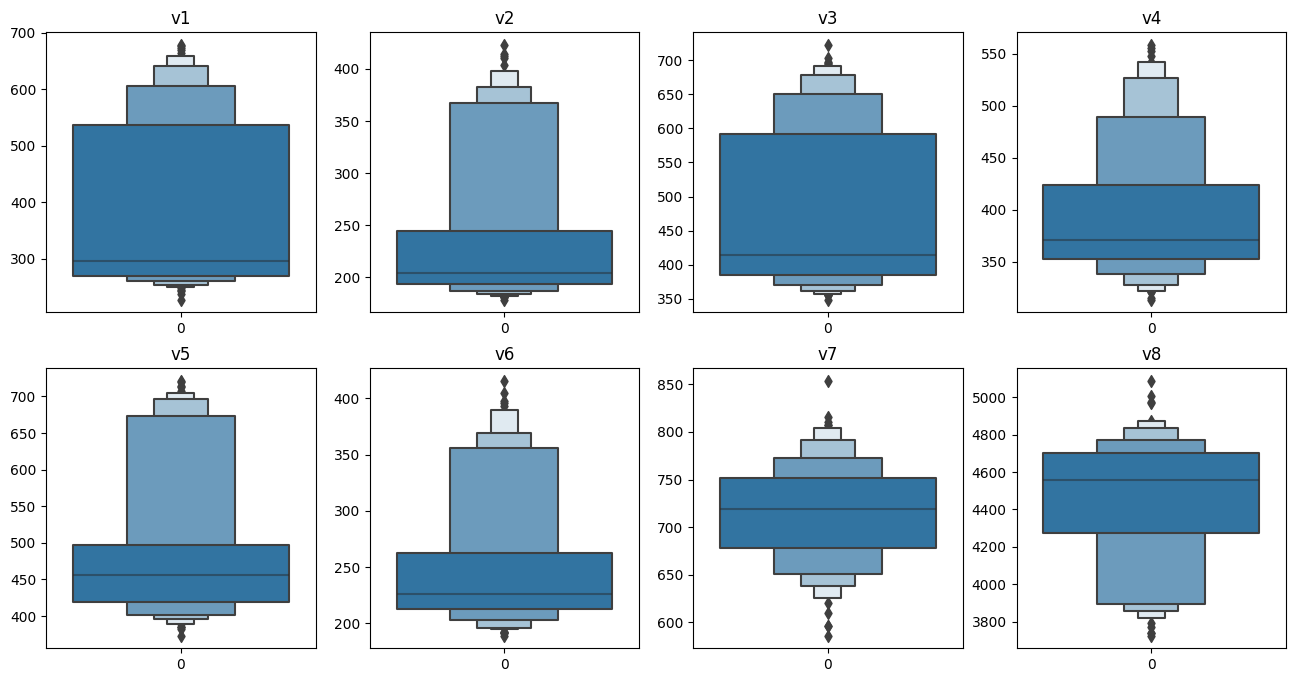

In [203]:
plt.figure(figsize=(16,8))
var_list = ["v1", "v2", "v3", "v4", "v5", "v6", "v7", "v8"]

for a, b in zip (var_list, [x for x in range (1,9)]):
    plt.subplot(2, 4, b)
    sns.boxenplot(data=df[a])
    plt.title(a)
plt.show()

Rentang dan rata-rata nilai variabel 1 hingga 7 berada di angka ratusan, sedangkan untuk variabel 8 berada di rentang ribuan. Menurut sebuah artikel (<a href="https://greenplanetnutrients.com/blog/tips-advice/understanding-plant-nutrition/">artikel 1</a> dan <a href="https://extension.umn.edu/testing-and-analysis/understanding-plant-analysis-crops#:~:text=To%20calculate%20nutrient%20uptake%2C%20multiply,individual%20plant%20can%20be%20determined.">artikel 2</a>), nutrisi pada tanaman dibagi menjadi 3 jenis yaitu Primary Macronutrients, Secondary Macronutrients, dan Micronutrients. Primary Macronutrients merupakan nutrisi yang jumlahnya paling besar jumlahnya pada suatu tanaman, contohnya Nitrogen, Phosporus, dan Potasium. Sedangkan Secondary Macronutrients dan Micronutrients merupakan nutrisi yang jumlahnya tidak lebih besar dari Primary Macronutrients, contohnya Kalsium, Sulfur, Boron, dan Seng.

Secara asumsi, variabel 8 merupakan ukuran Primary Macronutrients karena jumlahnya besar (ribuan). Sedangkan variabel 1 hingga 7 merupakan jumlah Secondary Macronutrients atau Micronutrients karena jumlahnya tidak sebesar variabel 8.

# v. Feature Engineering

Pada tahap ini dilakukan penyiapan data untuk dilakukan modeling. Feature engineering meliputi pembagian train dan test set, handling missing values, handling outliers, scaling, encoding, dan proses-proses lain yang dibutuhkan.

In [204]:
# Copy dataset ke variabel baru
df_new = df.copy()

### Train test split

Di tahap ini dilakukan pemisahan antara train set dan test set. Train set digunakan untuk melatih model sedangkan test set digunakan untuk menguji performansi prediksi model.

In [205]:
# Set fitur dan target
X = df_new.drop(columns=["target"])
y = df_new["target"]

In [206]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 128
Test size: 32


Dari hasil pemisahan 80% atau 128 data dari dataset dijadikan sebagai train set dan sisanya 20% atau 32 data dijadikan sebagai test set.

### Handling outlier

Pada tahap ini dilakukan pengecekan data yang memiliki outlier (data yang memiliki nilai ekstrim atau tidak biasa) pada dataset dan dilakukan treatment pada data outlier tersebut.

In [207]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist() # Ambil list fitur numerik untuk handling outlier
norm = [] # List distribusi normal
skew = [] # List distribusi skew

# Seleksi fitur distribusi
for c in num_col:
    if X_train[c].skew() <= 0.5 and X_train[c].skew() >= -0.5:
        norm.append(c)
    else:
        skew.append(c)
print("Distribusi normal:", norm)
print("Distribusi tidak normal:", skew)

Distribusi normal: ['v7']
Distribusi tidak normal: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8']


Dari hasil pengecekan distribusi, fitur variabel 7 (v7) merupakan fitur yang datanya berdistribusi normal. Sedangkan fitur variabel lainnya (variabel 1 hingga 6 dan 8) merupakan fitur yang datanya berdistribusi tidak normal (skew).

In [208]:
# Deteksi outlier pada fitur distribusi normal
for c in norm:
    batas_atas = X_train[c].mean() + 3 * X_train[c].std()
    batas_bawah = X_train[c].mean() - 3 * X_train[c].std()
    print(c)
    print("Batas atas : ", batas_atas)
    print("Batas bawah : ", batas_bawah)
    print("Outlier diatas batas atas : {}".format(len(X_train[X_train[c] > batas_atas])))
    print("Outlier dibawah batas bawah : {}".format(len(X_train[X_train[c] < batas_bawah])))
    print("Value maks : ", X_train[c].max())
    print("Value min : ", X_train[c].min())
    print("\n")

v7
Batas atas :  872.6682389572501
Batas bawah :  553.9799533007382
Outlier diatas batas atas : 0
Outlier dibawah batas bawah : 0
Value maks :  853.466666666666
Value min :  586.266666666666




Pada fitur distribusi normal, setelah dilakukan pengecekan tidak ada data outlier.

In [209]:
# Deteksi outlier pada fitur distribusi tidak normal
for c in skew:
    IQR = X_train[c].quantile(0.75) - X_train[c].quantile(0.25)
    batas_atas = X_train[c].quantile(0.75) + (1.5 * IQR)
    batas_bawah = X_train[c].quantile(0.25) - (1.5 * IQR)
    print(c)
    print("Batas atas : ", batas_atas)
    print("Batas bawah : ", batas_bawah)
    print("Outlier diatas batas atas : {}".format(len(X_train[X_train[c] > batas_atas])))
    print("Outlier dibawah batas bawah : {}".format(len(X_train[X_train[c] < batas_bawah])))
    print("Value maks : ", X_train[c].max())
    print("Value min : ", X_train[c].min())
    print("\n")

v1
Batas atas :  934.7250000000005
Batas bawah :  -131.60833333333466
Outlier diatas batas atas : 0
Outlier dibawah batas bawah : 0
Value maks :  676.066666666666
Value min :  237.6


v2
Batas atas :  341.6317708333344
Batas bawah :  103.57204861110938
Outlier diatas batas atas : 23
Outlier dibawah batas bawah : 0
Value maks :  414.2
Value min :  178.8


v3
Batas atas :  905.091666666666
Batas bawah :  70.09166666666601
Outlier diatas batas atas : 0
Outlier dibawah batas bawah : 0
Value maks :  702.533333333333
Value min :  355.5625


v4
Batas atas :  547.8109375000005
Batas bawah :  229.6067708333325
Outlier diatas batas atas : 3
Outlier dibawah batas bawah : 0
Value maks :  558.5
Value min :  315.625


v5
Batas atas :  615.8359374999995
Batas bawah :  297.54010416666665
Outlier diatas batas atas : 25
Outlier dibawah batas bawah : 0
Value maks :  719.2
Value min :  382.5625


v6
Batas atas :  361.1161458333333
Batas bawah :  123.0286458333332
Outlier diatas batas atas : 12
Outlier dib

Pada fitur distribusi skew, terdapat outlier pada fitur variabel 2 (23 outlier diatas batas atas), variabel 4 (3 outlier diatas batas atas), variabel 5 (25 outlier diatas batas atas), dan variabel 6 (12 outlier diatas batas atas). Selanjutnya data outlier ini akan ditreatment dengan metode capping, capping merupakan salah satu metode handling outliers dengan mengganti nilai outlier menjadi batas atas (upper boundary) maupun batas bawah (lower boundary) dari kolom/fiturnya.

In [210]:
# Capping outlier menggunakan winsorizer
winsorizer = Winsorizer(capping_method="iqr", tail="both", fold=1.5, variables=skew) # Capping untuk skew distribution

winsorizer.fit(X_train)
X_train = winsorizer.transform(X_train)

In [211]:
# Cek distribusi lagi setelah handling outlier
norm = []
skew = []

for c in num_col:
    if X_train[c].skew() <= 0.5 and X_train[c].skew() >= -0.5:
        norm.append(c)
    else:
        skew.append(c)
print("Distribusi normal:", norm)
print("Distribusi tidak normal:", skew)

Distribusi normal: ['v7']
Distribusi tidak normal: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8']


Setelah dilakukan handling outliers, distribusi data pada fitur variabel tetap sama (variabel 7 tetap berdistribusi normal, sedangkan varibel lainnya skew).

### Feature Selection

##### Korelasi fitur dengan target

Disini akan dilakukan seleksi fitur-fitur yang paling mempengaruhi nilai nutrisi tanaman. Sehingga akan meningkatkan akurasi model pada saat memprediksi target. Disini pengujian menggunakan uji pearson dan ANOVA. Untuk pengujian, threshold p-value yang ditetapkan disini adalah 0.05.

In [212]:
# Cek korelasi fitur numerik dan target dengan pearson
X_train[num_col].corrwith(y_train, method="pearson")

v1   -0.147652
v2   -0.446795
v3   -0.149538
v4   -0.433366
v5   -0.347308
v6   -0.487842
v7   -0.397700
v8    0.299448
dtype: float64

Dari hasil korelasi, variabel 1 hingga 7 berkolerasi dengan nutrisi tanaman tetapi berbanding berbanding terbalik (negatif). Artinya jika nilai variabel 1 hingga 7 meningkat, maka nilai target menurun dan begitu juga sebaliknya. Sedangkan variabel 8 berbanding lurus (positif) terhadap nutrisi tanaman.

In [213]:
# Cek yang paling berkolerasi dengan target berdasarkan p value

f_stat, p_val = f_regression(X_train[num_col], y_train)
col_list = X_train[num_col].columns.to_list()
data = {
    "fitur" : col_list,
    "p-value" : p_val
}
pearson_df = pd.DataFrame(data=data)
pearson_df["correlation"] = np.where(pearson_df["p-value"] > 0.05, "Not correlated", "Correlated")
pearson_df

,fitur,p-value,correlation
0,v1,9.626667e-02,Not correlated
1,v2,1.246157e-07,Correlated
2,v3,9.204353e-02,Not correlated
3,v4,3.228402e-07,Correlated
4,v5,5.905362e-05,Correlated
5,v6,5.198614e-09,Correlated
6,v7,3.342916e-06,Correlated
7,v8,5.952371e-04,Correlated


Dari hasil pengujian pearson, didapatkan variabel 1 dan variabel 3 tidak mempunyai korelasi dengan target (nutrisi tanaman). Sehingga fitur tersebut tidak diikutsertakan ke modeling.

In [214]:
# Cek korelasi fitur kategorik dan target dengan ANOVA
cat_col = X_train[["sample_type"]]
cat_col["sample_type"].replace(["lab 1","lab 2"], [0,1], inplace=True) # Encode kategorik
f_stat, p_val = f_classif(cat_col, y_train)
print(p_val[0])
if p_val[0] > 0.05:
    print("Not Correlated")
else:
    print("Correlated")

0.421758028381176
Not Correlated


C:\Users\user\AppData\Local\Temp\ipykernel_14740\1847492935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_col["sample_type"].replace(["lab 1","lab 2"], [0,1], inplace=True) # Encode kategorik


Dari hasil pengujian ANOVA, tidak ada korelasi antara fitur kategorik (sample_type) dengan target (nutrisi tanaman). Dapat dikatakan jenis pengambilan sampel dari suatu lab tidak mempengaruhi nilai nutrisi tanaman. Sehingga fitur tidak akan digunakan untuk modeling.

##### Korelasi antar fitur

Setelah dilakukan seleksi terhadap korelasi fitur dengan target, selanjutnya akan dilakukan seleksi berdasarkan seleksi antara fitur. Jika dua buah fitur atau lebih memiliki korelasi yang tinggi maka akan dipilih salah satu fitur untuk mewakili fitur-fitur yang berkolerasi tinggi tersebut karena nilainya sebanding.

<AxesSubplot: >

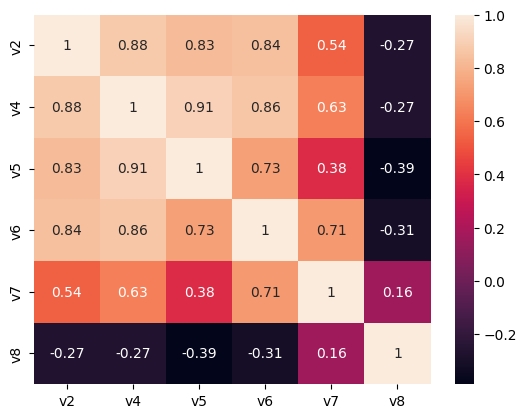

In [215]:
# Cek korelasi antar fitur dengan heatmap
sns.heatmap(X_train[["v2", "v4", "v5", "v6", "v7", "v8"]].corr(method="spearman"), annot=True)

Dari hasil heatmap fitur variabel 2 hingga 6 mempunyai korelasi yang tinggi (rata-rata korelasinya 0.9), sedangakan varibel 7 dan 8 korelasinya tidak terlalu tinggi. Maka variabel 2 akan dipilih untuk mewakili variabel 2 hingga 6. Kemudian variabel 7 dan 8 akan dipilih juga untuk modeling karena kurang berkolerasi terhadap variabel 2 maupun satu sama lain. Sehingga hasil seleksi fitur akhir yang digunakan untuk modeling hanya fitur variabel 2, 7 dan 8.

##### Feature scaling

Pada tahap ini dilakukan scaling pada fitur yang numerik, karena pada data ini fitur-fiturnya memiliki rentang yang berbeda (variabel 8 rentangnya ribuan, variabel 2 dan 7 ratusan) maka diperlukan penyamaan rentang nilai. Untuk scaling fitur yang berdistribusi normal menggunakan Standard Scaler, kemudian untuk yang berdistribusi skew menggunakan Min Max Scaler.

In [216]:
# Pembagian fitur distribusi normal dan skew
num_col_nd = ["v7"]
num_col_sd = ["v2", "v8"]

In [217]:
# Scaling fitur distribusi normal
standard_scaler = StandardScaler()
X_train_norm = standard_scaler.fit_transform(X_train[num_col_nd])
X_test_norm = standard_scaler.transform(X_test[num_col_nd])

In [218]:
# Scaling fitur distribusi skew
minmax_scaler = MinMaxScaler()
X_train_skew = minmax_scaler.fit_transform(X_train[num_col_sd])
X_test_skew = minmax_scaler.transform(X_test[num_col_sd])

In [219]:
# Concat hasil scaling
X_train_final = np.concatenate([X_train_norm, X_train_skew], axis=1)
X_test_final = np.concatenate([X_test_norm, X_test_skew], axis=1)

# vi. Modeling

### Model Definition

Untuk membuat model disini menggunakan beberapa algoritma machine learning, yaitu Linear Regression, SVM, KNN, Decision Tree, Random Forest, dan Ada Boost. Dari beberapa algoritma tersebut akan dievaluasi performancenya. Algoritma yang mempunyai performance terbaik akan dipilih sebagai base algoritma model untuk memprediksi nutrisi tanaman.

In [220]:
# Model initialization
model_lr = LinearRegression()
model_svm = SVR()
model_knn = KNeighborsRegressor()
model_dt = DecisionTreeRegressor(random_state=7)
model_rf = RandomForestRegressor(random_state=7)
model_ab = AdaBoostRegressor(random_state=7)

### Model Training

Selanjutnya dilakukan training model dengan menggunakan train set.

In [221]:
# Training model Linear Regression
model_lr.fit(X_train_final, y_train)

LinearRegression()

In [222]:
# Training model SVM
model_svm.fit(X_train_final, y_train)

SVR()

In [223]:
# Training model KNN
model_knn.fit(X_train_final, y_train)

KNeighborsRegressor()

In [224]:
# Training model Decision Tree
model_dt.fit(X_train_final, y_train)

DecisionTreeRegressor(random_state=7)

In [225]:
# Training model Random Forest
model_rf.fit(X_train_final, y_train)

RandomForestRegressor(random_state=7)

In [226]:
# Training model Ada Boost
model_ab.fit(X_train_final, y_train)

AdaBoostRegressor(random_state=7)

### Model Evaluation

Disini akan dilakukan evaluasi model setelah melakukan prediksi terhadap train set dan test set. Metriks yang untuk mengukur performance model adalah Root Mean Squared Error (RMSE) karena secara asumsi selisih sedikit nilai pada nutrisi tanaman memiliki perbedaan 1 (diasumsikan nutrisi tanaman yang bernilai 4 dan 5 memiliki perbedaan). Semakin kecil nilai RMSE, maka semakin baik performance model tersebut.

In [227]:
# Prediksi linear regression
y_pred_train_lr = model_lr.predict(X_train_final)
y_pred_train_lr = np.round(y_pred_train_lr, 2)

y_pred_test_lr = model_lr.predict(X_test_final)
y_pred_test_lr = np.round(y_pred_test_lr, 2)

# Prediksi SVM
y_pred_train_svm = model_svm.predict(X_train_final)
y_pred_train_svm = np.round(y_pred_train_svm, 2)

y_pred_test_svm = model_svm.predict(X_test_final)
y_pred_test_svm = np.round(y_pred_test_svm, 2)

# Prediksi KNN
y_pred_train_knn = model_knn.predict(X_train_final)
y_pred_train_knn = np.round(y_pred_train_knn, 2)

y_pred_test_knn = model_knn.predict(X_test_final)
y_pred_test_knn = np.round(y_pred_test_knn, 2)

# Prediksi Decision Tree
y_pred_train_dt = model_dt.predict(X_train_final)
y_pred_train_dt = np.round(y_pred_train_dt, 2)

y_pred_test_dt = model_dt.predict(X_test_final)
y_pred_test_dt = np.round(y_pred_test_dt, 2)

# Prediksi Random Forest
y_pred_train_rf = model_rf.predict(X_train_final)
y_pred_train_rf = np.round(y_pred_train_rf, 2)

y_pred_test_rf = model_rf.predict(X_test_final)
y_pred_test_rf = np.round(y_pred_test_rf, 2)

# Prediksi Ada Boost
y_pred_train_ab = model_ab.predict(X_train_final)
y_pred_train_ab = np.round(y_pred_train_ab, 2)

y_pred_test_ab = model_ab.predict(X_test_final)
y_pred_test_ab = np.round(y_pred_test_ab, 2)

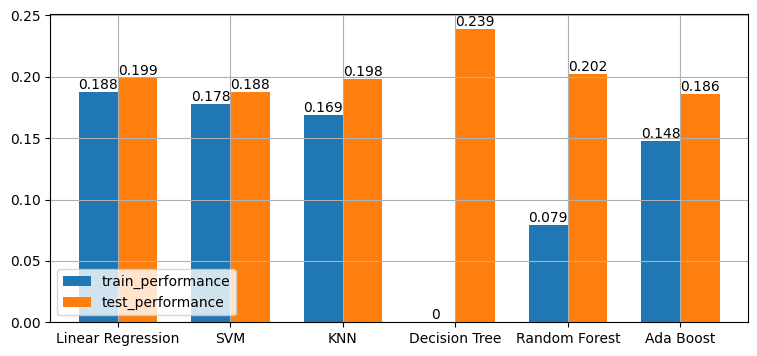

In [228]:
# Hasil prediksi setiap algoritma
train_pred_list = [y_pred_train_lr, y_pred_train_svm, y_pred_train_knn, y_pred_train_dt, y_pred_train_rf, y_pred_train_ab]
test_pred_list = [y_pred_test_lr, y_pred_test_svm, y_pred_test_knn, y_pred_test_dt, y_pred_test_rf, y_pred_test_ab]
model_name_list = ["Linear Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "Ada Boost"]
mse_train = []
mse_test = []

for x, y in zip(train_pred_list, test_pred_list):
    mse_train.append(np.round(math.sqrt(mean_squared_error(y_train, x)),3))
    mse_test.append(np.round(math.sqrt(mean_squared_error(y_test, y)),3))

data = {
    "train_performance" : mse_train,
    "test_performance" : mse_test
}

# Plot bar chart
df_cmp = pd.DataFrame(data=data, index=model_name_list)
chart = df_cmp.plot(kind="bar", grid=True, figsize=(9,4), width=0.7)
plt.xticks(rotation="horizontal")
plt.legend(loc='lower left')
for i in chart.containers:
    chart.bar_label(i,)

Dari hasil evaluasi performance, model yang menggunakan algoritma Ada Boost performance-nya lebih baik dibandingkan algoritma lain karena nilai RMSE pada test performance-nya lebih rendah dibandingkan algoritma lain. Didapatkan nilai RMSE test setnya adalah 0.186, artinya rata-rata kesalahan prediksi model tidak terlaluu berbeda jauh dengan nilai aktualnya. Kemudian selisihnya tidak begitu besar terhadap nilai train performance (0.186 dan 0.148). Maka algoritma Ada Boost akan dijadikan base model untuk memprediksi nutrisi tanaman. Selanjutnya akan dilakukan pencarian hyperparameter Ada Boost yang terbaik guna menaikan performance model (menurunkan nilai RMSE).

### Hyperparameter Tuning

Pencarian hyperparameter Ada Boost dilakukan dengan metode Grid Search. Grid Search merupakan cara mencari hyperparameter dengan mencoba seluruh kombinasi kemungkinan untuk mencari performance yang terbaik.

In [229]:
params = {
    "n_estimators": [10, 20, 50, 80, 100],
    "learning_rate": [0.00001, 0.0001, 0.01, 0.1, 1.0, 1.1, 1.2],
    "loss": ["linear", "square", "exponential"], 
}

grid_search = GridSearchCV(estimator=AdaBoostRegressor(random_state=7), param_grid=params, cv=5, verbose=1, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train_final, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=7),
             param_grid={'learning_rate': [1e-05, 0.0001, 0.01, 0.1, 1.0, 1.1,
                                           1.2],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 50, 80, 100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [230]:
# Tampilkan parameter terbaik
grid_search.best_params_

{'learning_rate': 0.0001, 'loss': 'exponential', 'n_estimators': 20}

Dari hasil Grid Search didapatkan parameter yang terbaik untuk Ada Boost adalah ('learning_rate': 0.0001, 'loss': 'exponential', 'n_estimators': 20).

In [231]:
# Ambil model dengan parameter terbaik
model_ab_tune = grid_search.best_estimator_

In [232]:
# Prediksi dengan model yang sudah dituning
y_pred_test_ab_tune = model_ab_tune.predict(X_test_final)
y_pred_test_ab_tune = np.round(y_pred_test_ab_tune, 2)

### Model Tuning Evaluation

In [233]:
# Perbandingan RMSE
print("RMSE test: {:.3f}".format(math.sqrt(mean_squared_error(y_test, y_pred_test_ab))))
print("RMSE test (tuning): {:.3f}".format(math.sqrt(mean_squared_error(y_test, y_pred_test_ab_tune))))

RMSE test: 0.186
RMSE test (tuning): 0.179


In [234]:
# Perbandingan target prediksi dengan target aktual (test set)
df_pred_ab_tune = pd.DataFrame(y_pred_test_ab_tune, columns=["target_pred"], index=y_test.index)
pred_test_cmp = pd.concat([y_test, df_pred_ab_tune], axis=1)
pred_test_cmp

,target,target_pred
104,4.77,4.87
88,4.67,4.68
40,4.62,4.68
82,4.64,4.67
99,4.66,4.69
79,4.77,4.69
77,4.76,4.69
125,5.03,4.70
66,4.48,4.68
115,4.98,4.89


Dari hasil tuning model, didapatkan performansi model lebih baik dari sebelumnya (nilai RMSE menurun dari 0.186 menjadi 0.179). Sehingga rata-rata error dalam memprediksi nutrisi tanaman lebih minimal. Selanjutnya model ini akan disimpan dan dicoba untuk memprediksi data inference (data diluar train set maupun test set). Untuk percobaan data inference terdapat pada notebook <b>inference_test.ipynb</b>.

### Model Saving

Pada tahap ini dilakukan penyimpanan model, scaler, dan list fitur yang dibutuhkan untuk modeling. Penyimpanan model dan scaler menggunakan library pickle, sedangkan untuk menyimpan list fitur menggunakan json.

In [235]:
# Save model, scaler, dan fitur
with open("aria_model.pkl", "wb") as file_1:
    pickle.dump(model_ab_tune, file_1)

with open("aria_s_scaler.pkl", "wb") as file_2:
    pickle.dump(standard_scaler, file_2)

with open("aria_mm_scaler.pkl", "wb") as file_3:
    pickle.dump(minmax_scaler, file_3)

with open("num_col_nd.txt", "w") as file_4:
    json.dump(num_col_nd, file_4)

with open("num_col_sd.txt", "w") as file_5:
    json.dump(num_col_sd, file_5)

# vii. Kesimpulan

Dari hasil korelasi, beberapa hal yang mempengaruhi nilai dari nutrisi tanaman adalah nilai pada variabel 2, 4, 5, 6, 7, dan 8. Secara asumsi itu merupakan nilai dari nutrisi Macronutrients dan Micronutrients pada tanaman. Berdasarkan korelasi, untuk nilai variabel 2 sampai 7 (diasumsikan Micronutrients) hubungannya tidak searah dengan nilai nutrisi tanaman (jika Micronutrients naik maka nilai nutrisi tanaman menurun). Dan untuk nilai variabel 8 (diasumsikan Macronutrients), hubungannya searah dengan nilai nutrisi tanaman (jika Macronutrients naik maka nilai nutrisi tanaman naik).

Dari hasil pembuatan model didapatkan nilai performance RMSE adalah 0.179. Dapat dikatakan rata-rata kesalahan tersebut masih terbilang kecil dan masih terbilang cukup baik dalam memprediksi nutrisi tanaman. Tetapi model cenderung hanya memprediksi nutrisi tanaman dari angka 4 hingga 5, karena dari dataset yang digunakan rentang nutrisinya hanya berkisar 4 sampai 5. Sehingga jika ada suatu data yang ingin diprediksi yang mungkin saja aktual nilai nutrisinya bukan 4 atau 5, maka model akan cenderung error dalam memprediksi dan tidak akan memprediksi ke nilai tersebut. Maka untuk improvisasi kedepannya dari model yang dibuat perlu dilakukan penambahan data dengan pola nilai yang baru untuk melatih model. Sehingga dapat meningkatkan lagi performance dan akurasi model untuk memprediksi nutrisi tanaman.

Selain dalam penambahan data, jika dataset yang digunakan dalam modeling telah ditambahkan/diupdate maka proses dalam feature engineering hingga modeling perlu dilakukan penyesuaian lagi. Contohnya dalam handling outlier, scaling, dan pemilihan algoritma model juga akan disesuaikan berdasarkan dataset yang digunakan. Karena mungkin saja proses yang telah dilakukan pada project ini tidak cocok jika diimplementasikan pada dataset yang baru sehingga menyebabkan akurasi prediksi tidak baik.
